## Sales_prediction Machine Learning Model

####  Welcome to my machine learning model developed to predict sales based on a given dataset. In the realm of sales forecasting, accurate predictions are crucial for businesses to make informed decisions, optimize inventory management, and effectively allocate resources.

This model leverages historical sales data and employs advanced machine learning algorithms to capture patterns and relationships between various factors that influence sales. By analyzing features such as time, pricing, promotions, customer demographics, and product attributes, the model learns to predict future sales with a high degree of accuracy.

The primary goal of this model is to provide businesses with actionable insights and predictions regarding their sales performance. By understanding the expected sales volume, companies can make informed decisions related to production, marketing strategies, resource allocation, and overall business planning.

Throughout the development process, I have employed robust data preprocessing techniques to clean and transform the sales dataset, ensuring its quality and relevance for training the model. Feature engineering techniques have been applied to extract meaningful information from the available data, enhancing the predictive power of the model.

To achieve optimal performance, I have implemented and fine-tuned various machine learning algorithms such as linear regression, decision trees, random forests, or even advanced techniques like gradient boosting or neural networks. The choice of algorithm has been driven by rigorous evaluation metrics such as mean squared error (MSE), mean absolute error (MAE), or root mean squared error (RMSE) to ensure the accuracy and reliability of the predictions.

By accurately predicting sales, this model can empower businesses to make data-driven decisions, optimize their operations, and stay ahead in today's competitive market. It provides a valuable tool for sales managers, marketing teams, and business stakeholders to plan effectively, set realistic targets, and maximize revenue generation.

I am excited to present this machine learning model as a solution that can help businesses gain insights into their sales performance, forecast future sales with confidence, and ultimately drive growth and success in the dynamic world of sales."

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from lazypredict.Supervised import LazyClassifier

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

## Upload DataSet

In [2]:
# Now upload the Dataset
data=pd.read_csv("Sales.csv")
data.sample(5)

,TV,Radio,Newspaper,Sales
106,25.00,11.00,29.70,7.20
135,48.30,47.00,8.50,11.60
198,283.60,42.00,66.20,25.50
130,0.70,39.60,8.70,1.60
77,120.50,28.50,14.20,14.20


In this code, the author is uploading a dataset for further analysis. The dataset is stored in a CSV file named "Sales.csv". The pd.read_csv() function from the pandas library is used to read the contents of the CSV file and store it in a pandas DataFrame called data.

## EDA

In [3]:
data.head(10)

,TV,Radio,Newspaper,Sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,12.00
3,151.50,41.30,58.50,16.50
4,180.80,10.80,58.40,17.90
5,8.70,48.90,75.00,7.20
6,57.50,32.80,23.50,11.80
7,120.20,19.60,11.60,13.20
8,8.60,2.10,1.00,4.80
9,199.80,2.60,21.20,15.60


The code you provided is performing an Exploratory Data Analysis (EDA) on the dataset. EDA is a preliminary step in data analysis to understand the data and gain insights before applying any machine learning algorithms.

In the focal cell, the code is using the data.head(10) function to display the first 10 rows of the dataset. This function shows a tabular representation of the data with the column names and corresponding values.

In [4]:
print("Number of Rows",data.shape[0])
print("Number of columns",data.shape[1])
data.shape

Number of Rows 200
Number of columns 4


(200, 4)

data.shape: This line returns the shape of the DataFrame data, which represents the dimensions of the dataset. The result is a tuple in the format (number_of_rows, number_of_columns).

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


The code in the focal cell is using the data.info() function to provide information about the dataset. This function displays a summary of the DataFrame, including the number of rows, the column names, the number of non-null values in each column, and the data types of the columns.

Here is the information provided by the data.info() function for the given dataset:

The dataset has a total of 200 rows.
There are 4 columns in the dataset, named 'TV', 'Radio', 'Newspaper', and 'Sales'.
All columns have a non-null count of 200, indicating that there are no missing values in the dataset.
The data type of all columns is float64, which represents numerical values with decimal points.
The memory usage of the dataset is 6.4 KB.

In [6]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.00,0.05,0.06,0.90
Radio,0.05,1.00,0.35,0.35
Newspaper,0.06,0.35,1.00,0.16
Sales,0.90,0.35,0.16,1.00


In the focal cell, the code data.corr() is used to calculate the correlation between the columns in the dataset. Correlation is a statistical measure that indicates the strength and direction of the linear relationship between two variables.

The output you provided is the correlation matrix, which shows the correlation coefficients between each pair of columns in the dataset. The correlation coefficients range from -1 to 1. A value of 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.

In the correlation matrix, each column represents a variable, and the values in the cells represent the correlation coefficient between the corresponding pair of variables. For example, the correlation coefficient between the 'TV' column and the 'Sales' column is 0.90, indicating a strong positive correlation between TV advertising expenditure and sales. Similarly, the correlation coefficient between the 'Newspaper' column and the 'Sales' column is 0.16, indicating a weaker positive correlation.

The correlation matrix provides valuable insights into the relationships between variables in the dataset. It can help identify which variables are strongly or weakly correlated, which can be useful for feature selection, identifying important predictors, and understanding the underlying patterns in the data.

<AxesSubplot:>

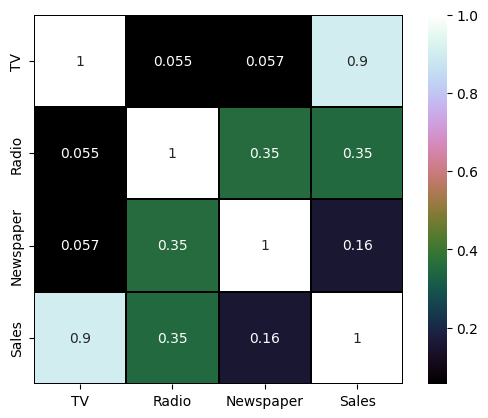

In [7]:
sns.heatmap(data.astype(float).corr(),linewidth=0.25,vmax=1.0,square=True,cmap='cubehelix',linecolor='k',annot=True)

In [8]:
data.describe().round(3)

,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,15.13
std,85.85,14.85,21.78,5.28
min,0.70,0.00,0.30,1.60
25%,74.38,9.97,12.75,11.00
50%,149.75,22.90,25.75,16.00
75%,218.82,36.52,45.10,19.05
max,296.40,49.60,114.00,27.00


In [9]:
# it give the percentile according to the given list 
data.describe(percentiles=[.01,0.05,0.20,.25,.50,.60,.75,.90,.92,.93,.97,.100]).round(3)

,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,15.13
std,85.85,14.85,21.78,5.28
min,0.70,0.00,0.30,1.60
1%,5.39,0.40,1.00,4.78
5%,13.20,2.00,3.60,6.60
10%,24.88,3.40,5.99,7.96
20%,59.18,7.68,9.38,10.40
25%,74.38,9.97,12.75,11.00
50%,149.75,22.90,25.75,16.00


The percentiles parameter is set to a list of percentile values ranging from 0.01 to 1.00. These percentiles represent the values below which a given percentage of observations in each column falls.
The .round(3) method is applied to round the calculated statistics to three decimal places.
The result of running this code is a table displaying the descriptive statistics for each column in the dataset. The columns in the table represent the variables ('TV', 'Radio', 'Newspaper', and 'Sales'), and the rows display the computed statistics such as count, mean, standard deviation, minimum, percentiles, and maximum.

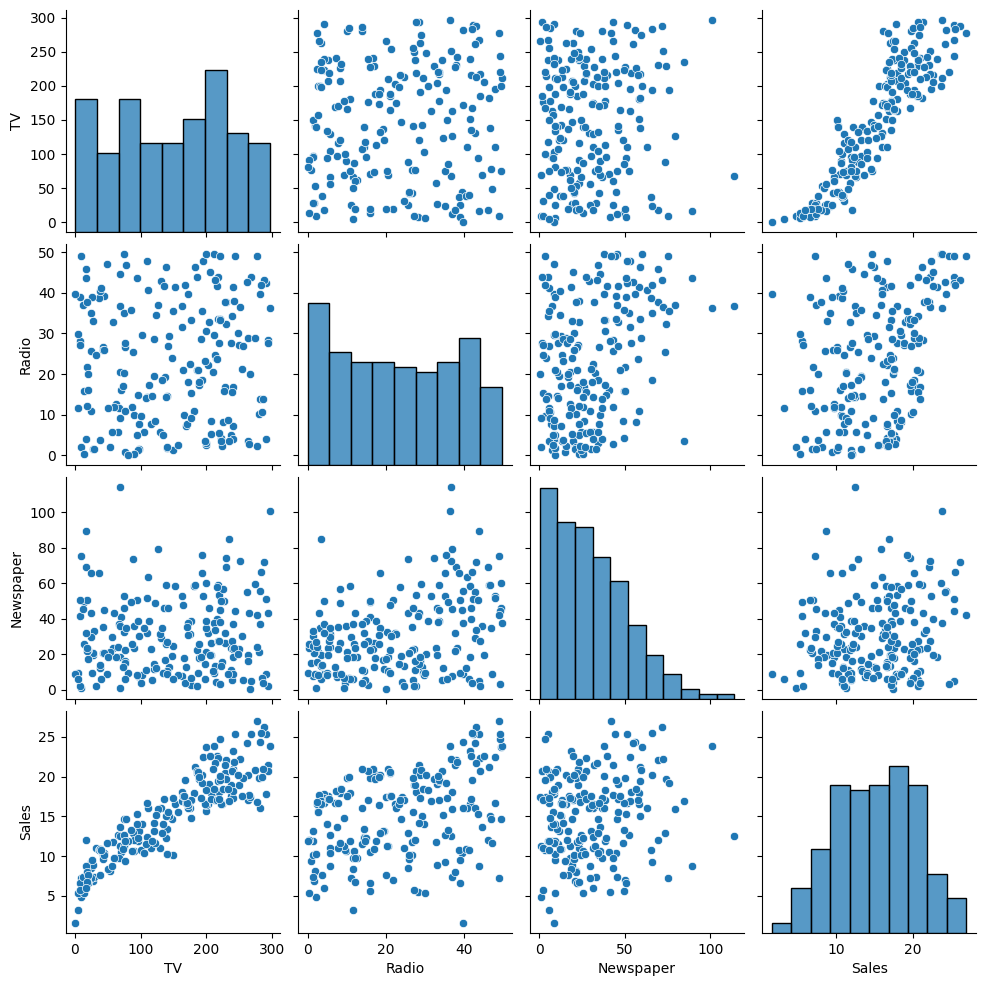

In [10]:
sns.pairplot(data=data)
plt.show()

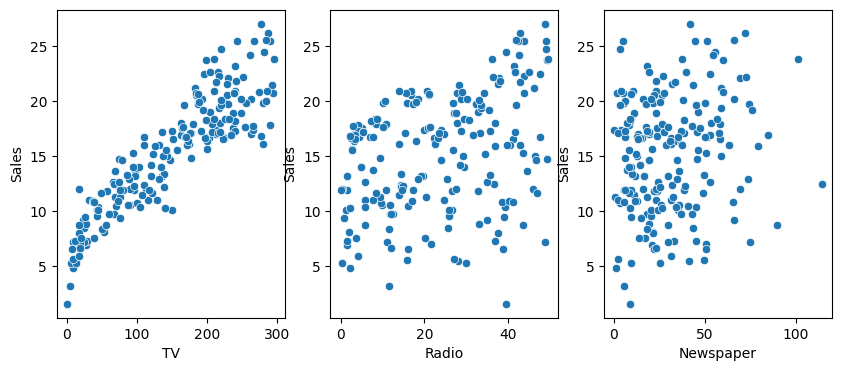

In [11]:
fig,(ax1,ax2,ax3)=plt.subplots(ncols=3,figsize=(10,4))
sns.scatterplot(data['TV'],data['Sales'],ax=ax1)
sns.scatterplot(data['Radio'],data['Sales'],ax=ax2)
sns.scatterplot(data['Newspaper'],data['Sales'],ax=ax3)
plt.show()

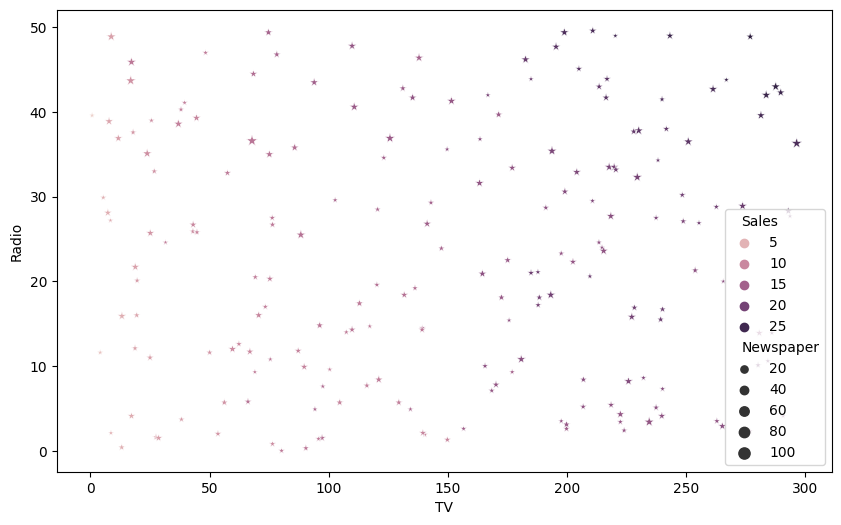

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(data['TV'],data['Radio'],hue=data['Sales'],size=data['Newspaper'],marker="*")
plt.show()

- the purpose of the plot is to understand the data structure

In [13]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [14]:
data.duplicated().any()

False

- Hence there is no-null and duplicate value present 

## Scaling

Scaling, in the context of data preprocessing in machine learning, refers to the transformation of input data to a specific range or distribution. The purpose of scaling is to normalize the features of the dataset, ensuring that they are on a similar scale and removing any potential bias that might occur due to differences in the magnitudes of the features.

In [15]:
X=data.drop("Sales",axis=1)
y=data['Sales']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
print("x_train shape",x_train.shape)
print("x_ttest shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (140, 3)
x_ttest shape (60, 3)
y_train shape (140,)
y_test shape (60,)


## Now Use the LinearRegression to Predict the data

In [17]:
lr=LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [18]:
y_prd=lr.predict(x_test)

In [19]:
print("Mean Absolute Error (MAE)",mean_absolute_error(y_test,y_prd))
print("Mean Squared Error (MSE)",mean_squared_error(y_test,y_prd))
print("R2 score",r2_score(y_test,y_prd))

Mean Absolute Error (MAE) 1.3662313868452758
Mean Squared Error (MSE) 3.938015220480287
R2 score 0.8692052734910128


## Comparing Actual value Vs Predict Value

In [20]:
comparing_data=pd.DataFrame({"Actual":y_test,"Prediction":y_prd})
comparing_data.head()

,Actual,Prediction
18,11.30,10.69
170,8.40,8.67
107,12.00,9.60
98,25.40,25.00
177,16.70,14.74


In [21]:
comparing_data.describe().round(1)

,Actual,Prediction
count,60.00,60.00
mean,14.10,14.30
std,5.50,5.10
min,1.60,5.40
25%,10.00,10.00
50%,14.40,13.70
75%,17.40,18.10
max,26.20,25.00


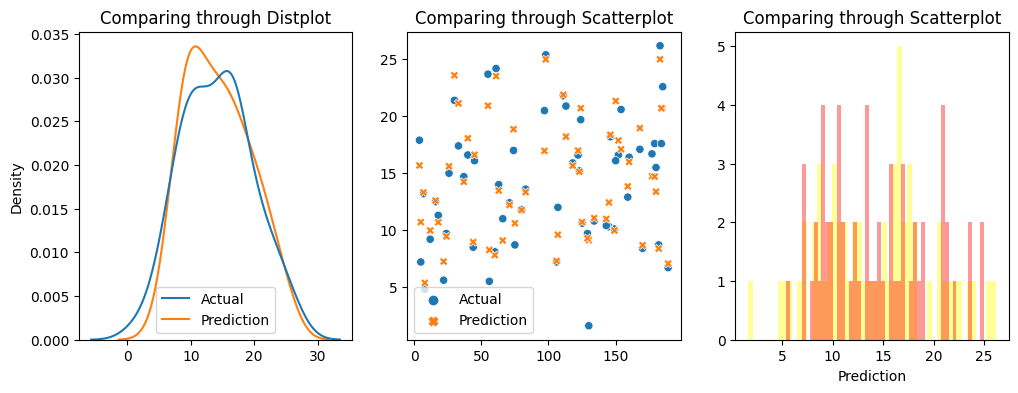

In [22]:
fig, (ax1,ax2,ax3)=plt.subplots(ncols=3,figsize=(12,4))

ax1.set_title("Comparing through Distplot")
sns.kdeplot(data=comparing_data,ax=ax1)

ax2.set_title("Comparing through Scatterplot")
sns.scatterplot(data=comparing_data,ax=ax2)

ax3.set_title("Comparing through Scatterplot")
sns.distplot(comparing_data['Actual'], color='yellow',kde=False,bins=50,ax=ax3)
sns.distplot(comparing_data['Prediction'],color='red',kde=False,bins=50,ax=ax3)
plt.show()

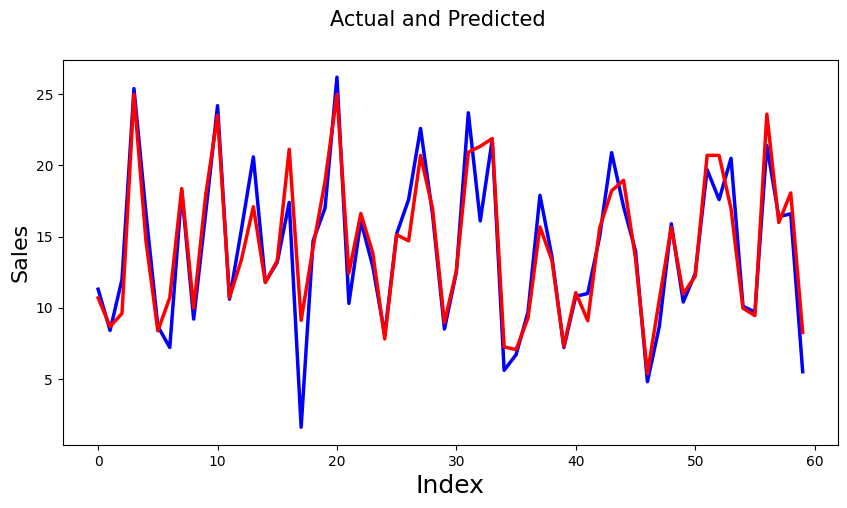

In [23]:
# Actual and Predicted
c = [i for i in range(60)] # generating index 
fig = plt.figure(figsize=(10,5))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_prd, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=15)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16) 
plt.legend
plt.show()

## Conclusion

- Based on the evaluation metrics, the performance of my linear regression model is quite promising. With a Mean Absolute Error (MAE) of 1.3662, it indicates that, on average, my model's predictions deviate from the actual values by approximately 1.3662 units. The lower the MAE, the better my model's accuracy, suggesting that my model's predictions are relatively close to the true values.
- LinearRegression model give me almost 86% accurate Result
